In [1]:
from astropy.table import Table

In [2]:
data = Table.read('matched_gaia_galah.fits')

In [3]:
data.dtype.names

('solution_id',
 'designation',
 'source_id2',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'phot_g_n_o

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
M_G = data['phot_g_mean_mag'] + 5.*np.log10(data['parallax']) -10

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [17]:
pm = np.sqrt(data['pmra']**2. + data['pmdec']**2) 

In [36]:
halo = (np.abs(data['b']) > 20) & (data['parallax'] < 1) & (pm < 10.**0.6)

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [37]:
np.max(data['fe_h'])

3.4363378307178816

(5, -5)

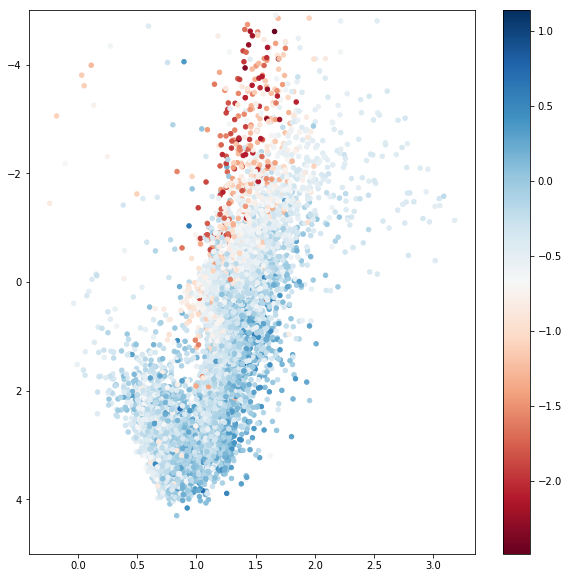

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data['bp_rp'][halo], M_G[halo], s=20, c=data['fe_h'][halo], cmap=plt.cm.get_cmap('RdBu'))
plt.gca().invert_yaxis()
plt.colorbar()
plt.ylim(5, -5)

In [39]:
highmethalo = halo & (data['fe_h'] > -0.5)

(5, -5)

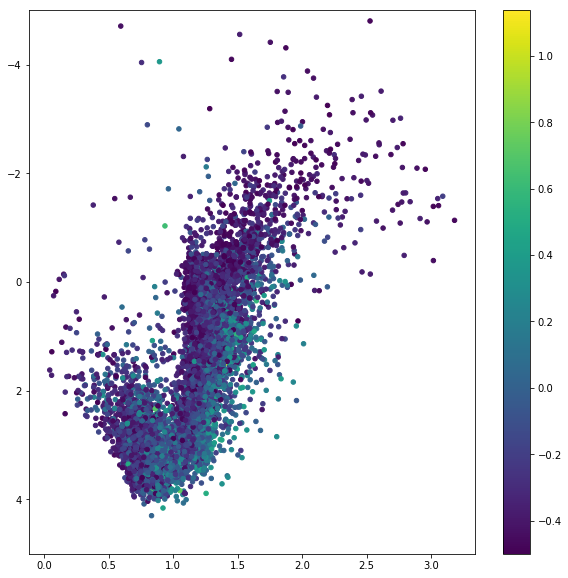

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(data['bp_rp'][highmethalo], M_G[highmethalo], s=20, c=data['fe_h'][highmethalo], cmap=plt.cm.get_cmap('viridis'))
plt.gca().invert_yaxis()
plt.colorbar()
plt.ylim(5, -5)

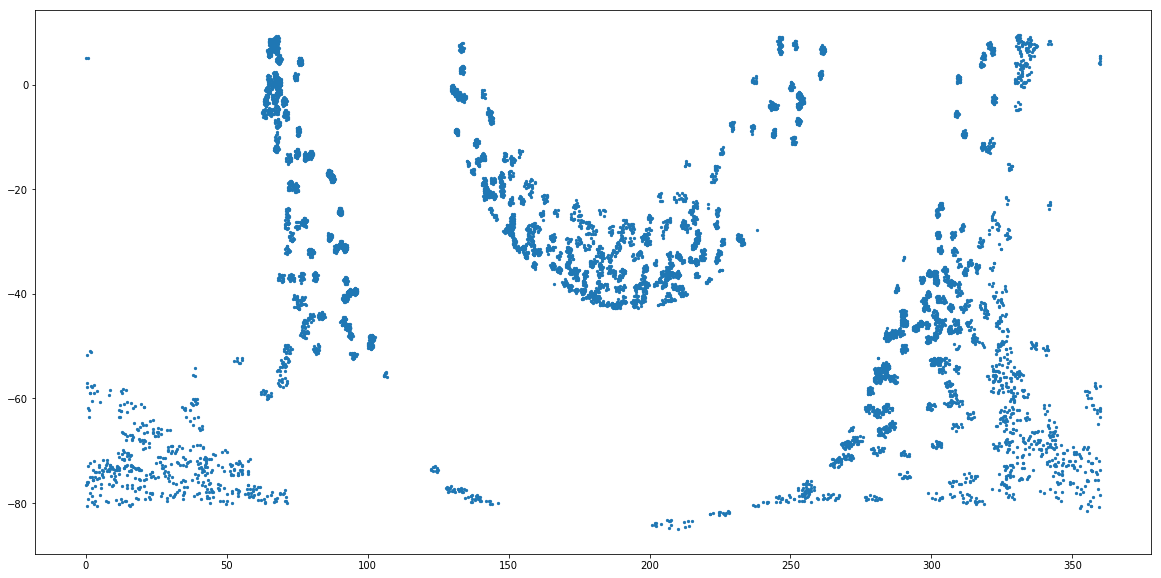

In [46]:
plt.figure(figsize=(20, 10))
plt.scatter(data['ra'][highmethalo], data['dec'][highmethalo], s=5)

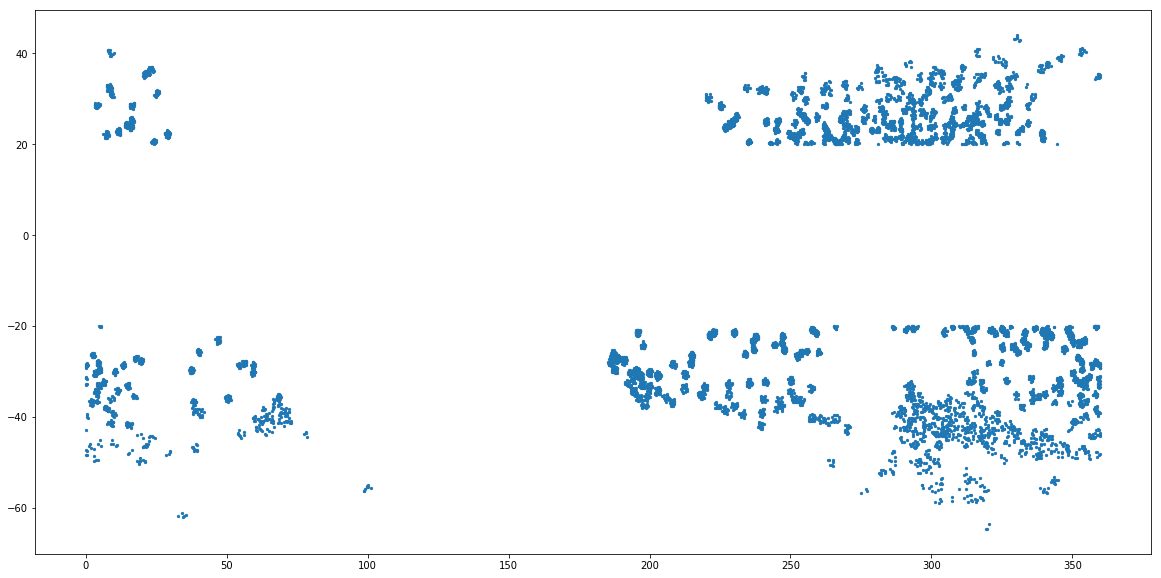

In [45]:
plt.figure(figsize=(20, 10))
plt.scatter(data['l'][highmethalo], data['b'][highmethalo], s=5)

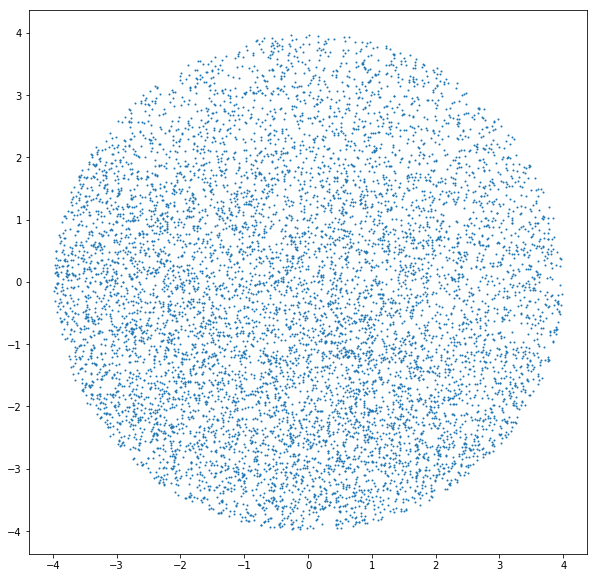

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(data['pmra'][highmethalo], data['pmdec'][highmethalo], s=1)

In [49]:
highmetRedhalo = halo & (data['fe_h'] > -0.5) & (data['bp_rp'] > 2.5)

/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


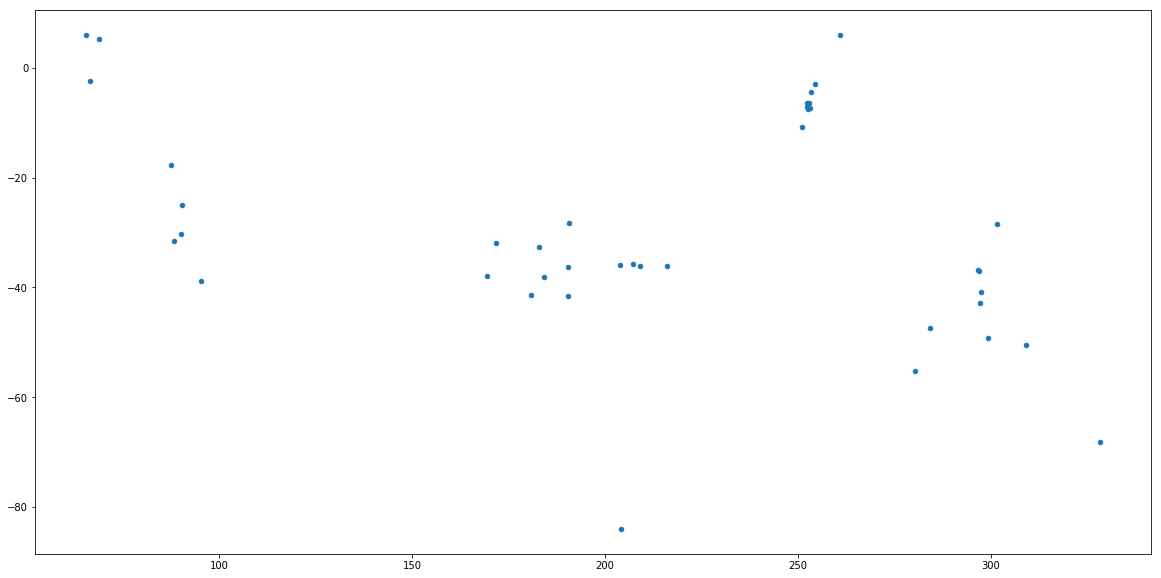

In [54]:
plt.figure(figsize=(20, 10))
plt.scatter(data['ra'][highmetRedhalo], data['dec'][highmetRedhalo], s=20)

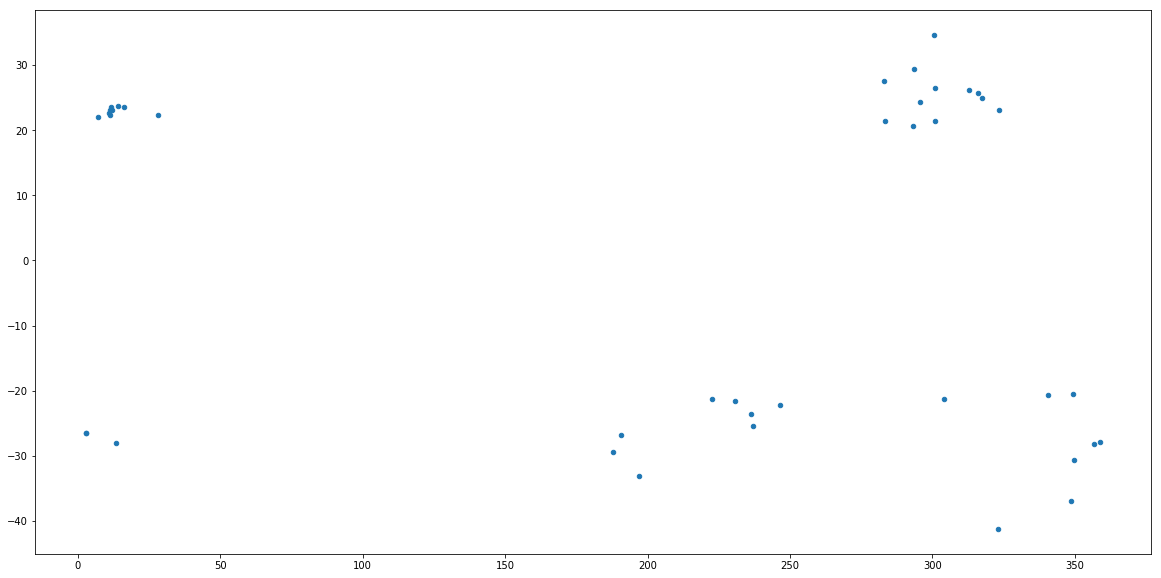

In [53]:
plt.figure(figsize=(20, 10))
plt.scatter(data['l'][highmetRedhalo], data['b'][highmetRedhalo], s=20)

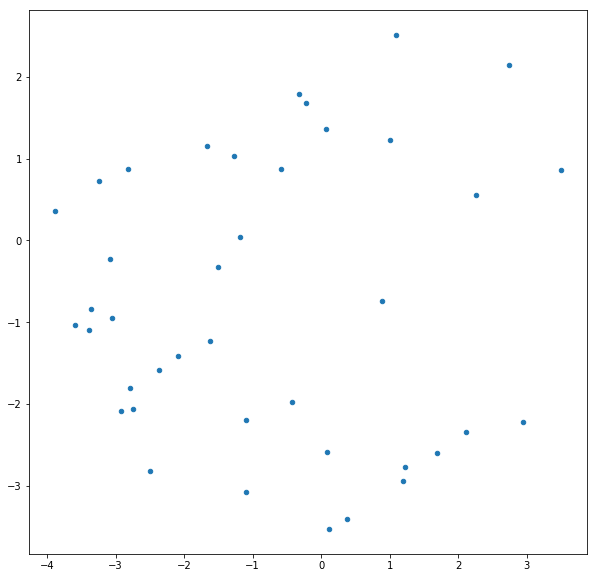

In [55]:
plt.figure(figsize=(10, 10))
plt.scatter(data['pmra'][highmetRedhalo], data['pmdec'][highmetRedhalo], s=20)